In [ ]:
#kaggle HR Analytics

In [65]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('HR_Analytics.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [61]:
left = df[df.left==1]
left.shape
#3571 rows and 1o columns when someone left the firm

(3571, 10)

In [62]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [ ]:
maximum employers retained in the firm

In [60]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


In [ ]:
#Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
#Average monthly hours are higher in employees leaving the firm 
#Employees who are given promotion are likely to be retained at firm

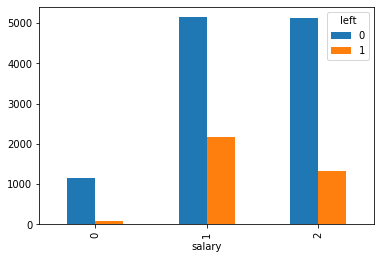

In [63]:
#Impact of salary on employee retention
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [ ]:
#employees with high salaries are likely to not leave the company

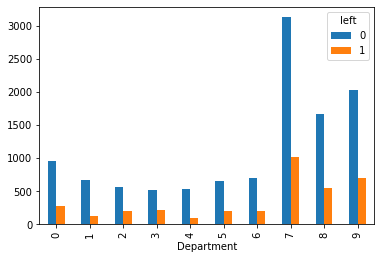

In [66]:
#Department wise employee retention rate
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [ ]:
#From above chart there seem to be some impact of department on employee retention
#but it is not major hence we will ignore department in our analysis

In [68]:
'''From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1.Satisfaction Level
2.Average Monthly Hours
3.Promotion Last 5 Years
4.Salary'''

'From the data analysis so far we can conclude that we will use following variables as independant variables in our model\n1.Satisfaction Level\n2.Average Monthly Hours\n3.Promotion Last 5 Years\n4.Salary'

In [18]:
#Tackle salary variable as it has three levels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = df #create new data frame
dfle.salary = le.fit_transform(dfle.salary)
dfle.Department = le.fit_transform(dfle.Department)
#it takes the column('town') and return the labels
dfle

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfle[['promotion_last_5years','salary','time_spend_company','average_montly_hours','satisfaction_level']],dfle.left,train_size=0.3,random_state=10)
#90% sample used for training
#Random_state :This is to check and validate the data when running the code multiple times.
#Setting random_state a fixed value will guarantee that the same sequence of random numbers is generated each time you run the code.
X_test

,promotion_last_5years,salary,time_spend_company,average_montly_hours,satisfaction_level
13982,0,1,4,125,0.65
822,0,1,3,128,0.41
13751,0,2,7,125,0.44
9656,0,2,5,190,0.93
13497,0,2,6,170,0.76
...,...,...,...,...,...
7212,0,2,2,160,0.66
12308,0,2,3,145,0.41
596,0,1,5,222,0.86
13802,0,2,7,190,0.54


In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\senat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:

y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
model.score(X_test,y_test)

0.76

In [ ]:
#76% is the accruracy of the model